In [118]:
import pandas as pd
import numpy as np
from numpy.fft import fft, ifft, fftfreq
from scipy.signal import periodogram, stft, hilbert
from scipy.signal.windows import hamming
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from os.path import join, expanduser, dirname, basename, exists
import pickle
import matplotlib.dates as mdates

constant_dir = expanduser('~/Documents/temp/src/functions/constants/')
meas_dir = expanduser('~/Documents/temp/data/snowschool/station/')
model_dir = expanduser('~/Documents/temp/data/snowschool/modeled/')

with open(join(meas_dir, 'df.pkl'), 'rb') as f:
    meas = pickle.load(f)

with open(join(constant_dir, 'sensor_heights.pkl'), 'rb') as f:
    sensor_heights = pickle.load(f)

with open(join(model_dir, 'temps.pkl'), 'rb') as f:
    model = pickle.load(f)

pd.options.plotting.backend = 'matplotlib'

In [3]:
sub = meas[pd.to_datetime('2020-11-18T00:00').tz_localize('US/Mountain'):pd.to_datetime('2020-12-11T23:00').tz_localize('US/Mountain')]

In [53]:
cols = [c for c in sub.columns if 'air_temp' in c]
cols = [c for c in cols if int(c.split('_')[-1]) < 11 and int(c.split('_')[-1]) > 1]
test = sub[cols]

Text(0, 0.5, 'PSD')

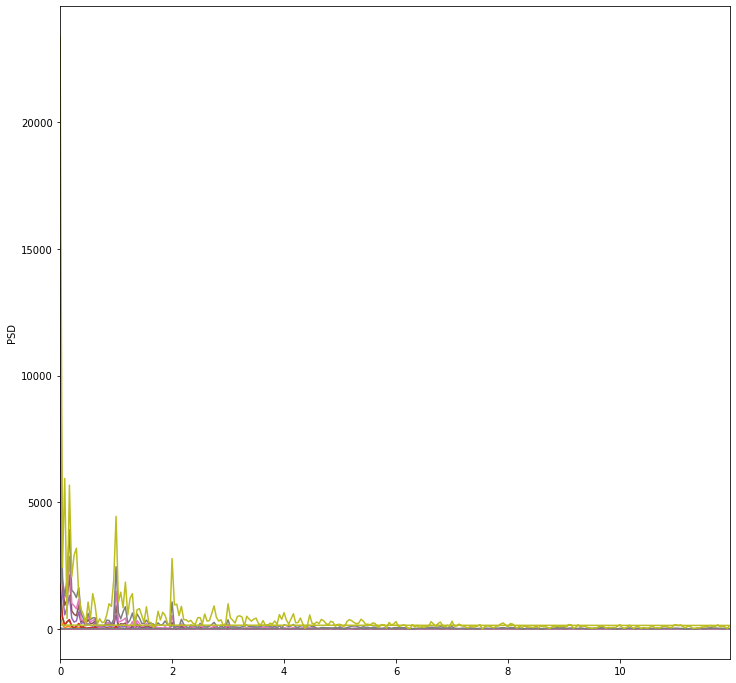

In [59]:
plt.subplots(figsize = (12,12))
fs = fftfreq(len(test), d = 1/24)
A = np.abs(fft(test**2, axis = 0))
plt.plot(fs, A)
plt.xlim(0, fs.max())
plt.ylabel('PSD')

Text(0, 0.5, 'Amplitude')

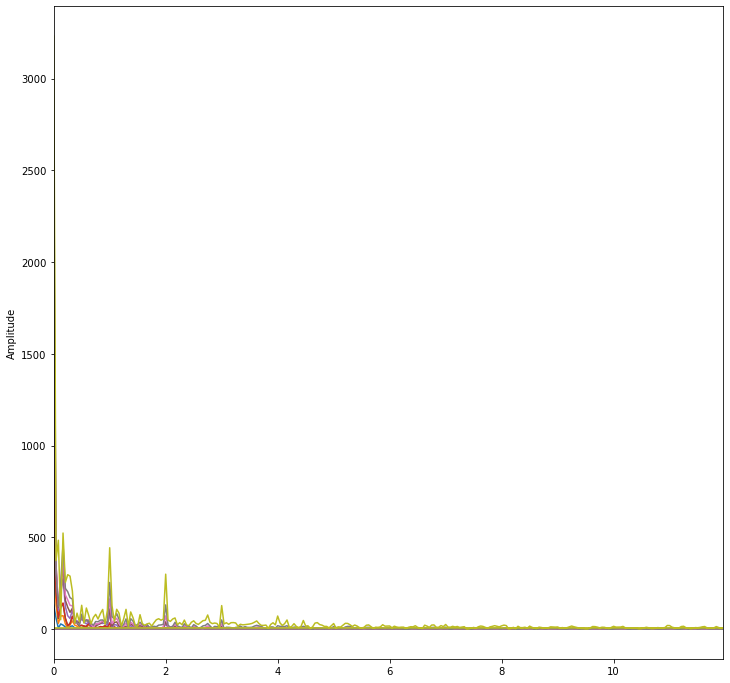

In [60]:
plt.subplots(figsize = (12,12))
fs = fftfreq(len(test), d = 1/24)
A = np.abs(fft(test, axis = 0))
plt.plot(fs, A)
plt.xlim(0, fs.max())
plt.ylabel('Amplitude')

In [144]:
cols = [c for c in sub.columns if 'air_temp' in c]
cols = [c for c in cols if int(c.split('_')[-1]) < 11 and int(c.split('_')[-1]) > 1]
test = sub[cols]

In [145]:
a = test.air_temp_10

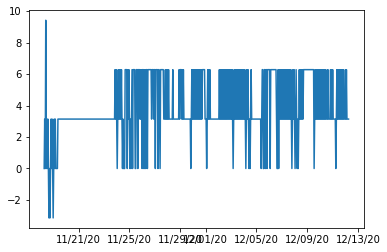

In [146]:
f,ax = plt.subplots()
plt.plot(a.rolling(96, min_periods=1).apply(lambda s: np.nansum(np.angle(fft(s)))))
date_format = mdates.DateFormatter('%D')
ax.xaxis.set_major_formatter(date_format)

In [152]:
test.air_temp_2.values.shape

(576,)

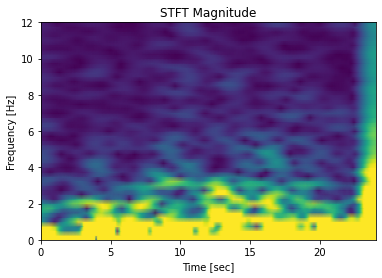

In [153]:
f,t,Zxx = stft(test.air_temp_2.values, fs = 24, nperseg=96, noverlap=95)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.01, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [155]:
t.shape

(577,)

In [160]:
a = np.sum(Zxx, axis = 0)

/Users/zachkeskinen/miniconda3/envs/snow_temps/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


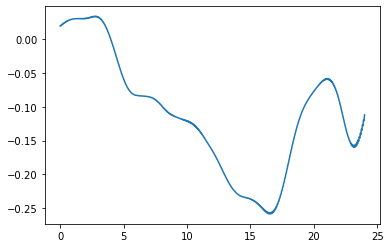

In [161]:
plt.plot(t, a)